<a href="https://colab.research.google.com/github/niteshkumar0205/NITESHKUMAR/blob/main/task_5_datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IPL Dataset analysis

#Intern name : Niteshkumar G
#Task 5: Exploratory Data Analysis - Sports Dataset :https://bit.ly/34SRn3b 
#Problem Statement :As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team. 


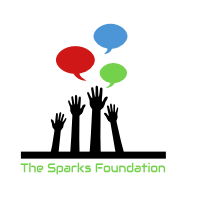


#Importing libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Importing the dataset

data = pd.read_csv("/content/matches.csv")

In [39]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [8]:
#Shape of the dataset

data.shape


(756, 18)

In [9]:
#Information regarding the null values and the datatype of the features in the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [38]:
#Description of the dataset

data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


#CLEANING THE DATASET

In [11]:
#I want to get total null values of the dataset from each column

data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [12]:
#Drop umpire

print(data)
data.drop('umpire3', axis = 1, inplace = True)
print(data)

        id  season  ...         umpire2                  umpire3
0        1    2017  ...        NJ Llong                      NaN
1        2    2017  ...          S Ravi                      NaN
2        3    2017  ...       CK Nandan                      NaN
3        4    2017  ...   C Shamshuddin                      NaN
4        5    2017  ...             NaN                      NaN
..     ...     ...  ...             ...                      ...
751  11347    2019  ...        O Nandan                   S Ravi
752  11412    2019  ...     Nitin Menon                Ian Gould
753  11413    2019  ...             NaN                      NaN
754  11414    2019  ...  Bruce Oxenford  Chettithody Shamshuddin
755  11415    2019  ...       Ian Gould              Nigel Llong

[756 rows x 18 columns]
        id  season  ...         umpire1         umpire2
0        1    2017  ...     AY Dandekar        NJ Llong
1        2    2017  ...  A Nand Kishore          S Ravi
2        3    2017  ...    

In [13]:
data.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

#ANALYZING THE DATA

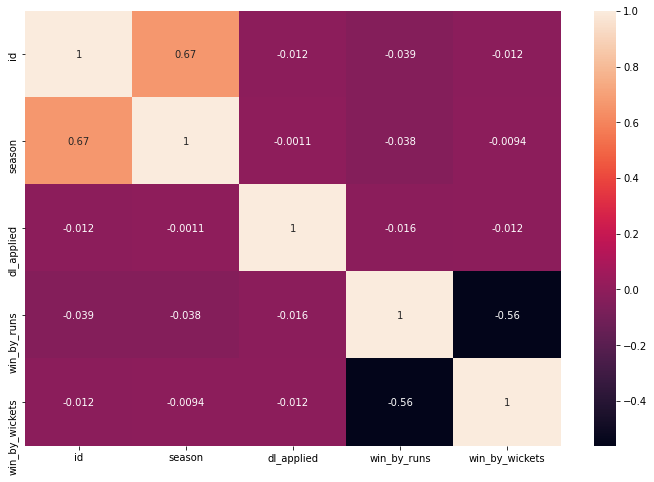

In [37]:
#Showing the correlation between each measure value in the dataset
data.corr()
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [15]:
data["toss_decision"].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

In [16]:
#Checking number of matches held in that 

data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [17]:
data['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


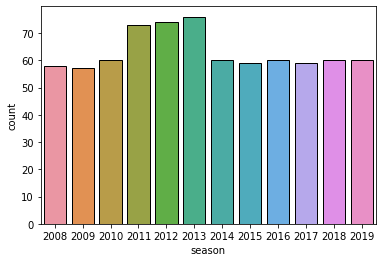

In [36]:
#Plotting the dataset into the form of a count plot

sns.countplot(data['season'], edgecolor = 'black')

#ACA-VDCA-STADIUM WITH LEAST MATCHES

#EDEN GARDENS-STADIUM WITH MOST NO OF MATCHES

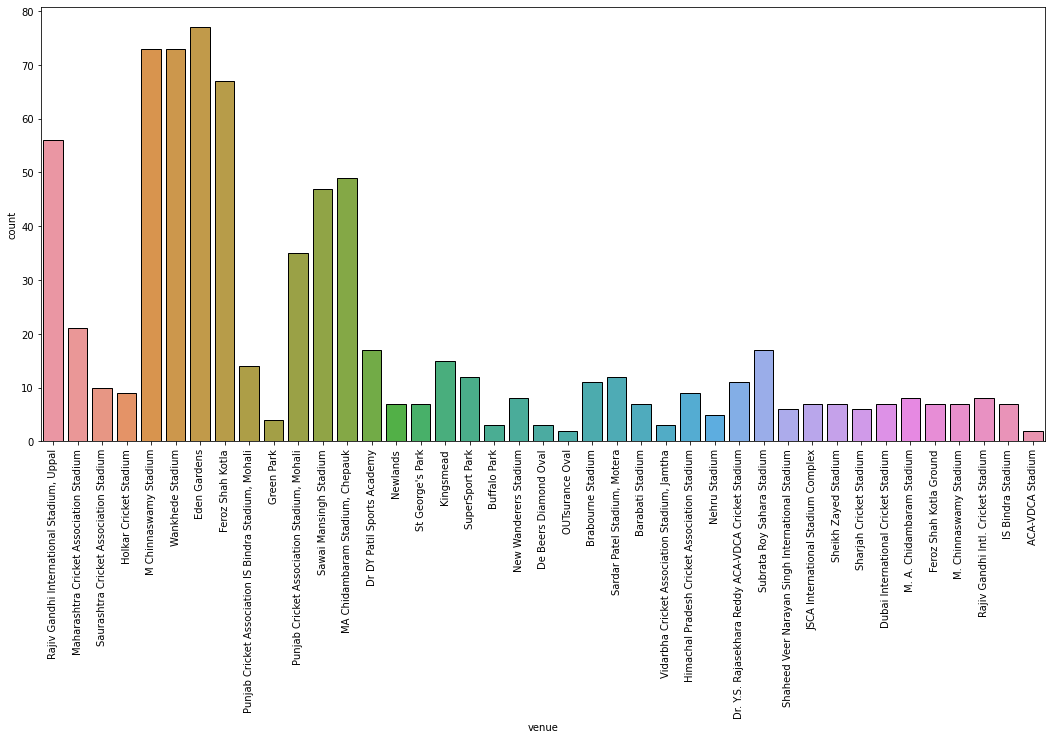

In [19]:
plt.figure(figsize= (18,8))
sns.countplot(x=data['venue'], edgecolor = 'black')
plt.xticks(rotation = 90)
plt.show()

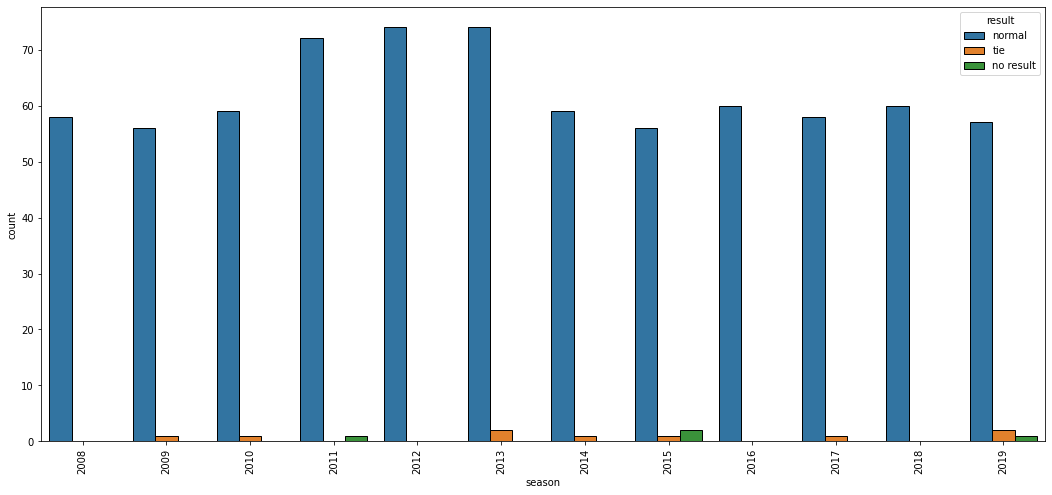

In [20]:
plt.figure(figsize= (18,8))
sns.countplot(x=data['season'], hue = data["result"], edgecolor = 'black')
plt.xticks(rotation = 90)
plt.show()

In [35]:
#Which team won by runs in max

data[data['win_by_runs'] == 146][['season', 'city', 'team1', 'team2','win_by_runs', 'winner']]

,season,city,team1,team2,win_by_runs,winner
43,2017,Delhi,Mumbai Indians,Delhi Daredevils,146,Mumbai Indians


# MOST WINS IN IPL 

MUMABI
CHENNAI
KOLKATA

In [22]:
#Count of each team winning matches count

data['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

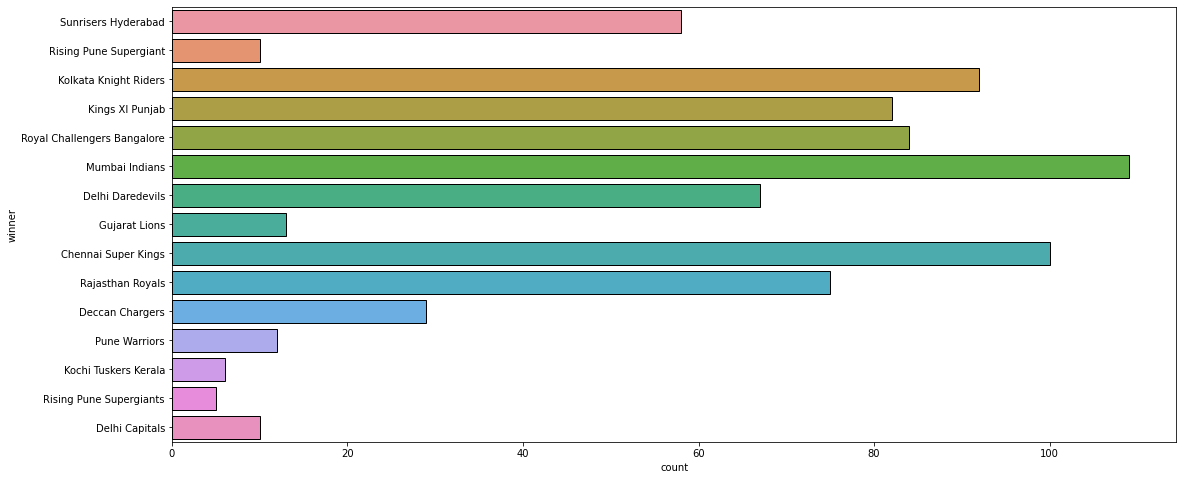

In [23]:
plt.figure(figsize= (18,8))
sns.countplot(y= data['winner'], edgecolor = 'black')
plt.show()

In [24]:
data['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

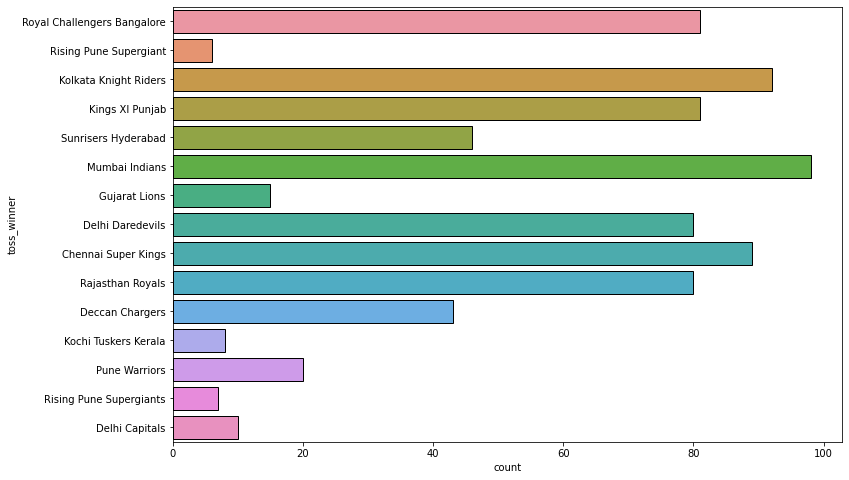

In [25]:
plt.figure(figsize= (12,8))
sns.countplot(y = data['toss_winner'], edgecolor = 'black')
plt.show()

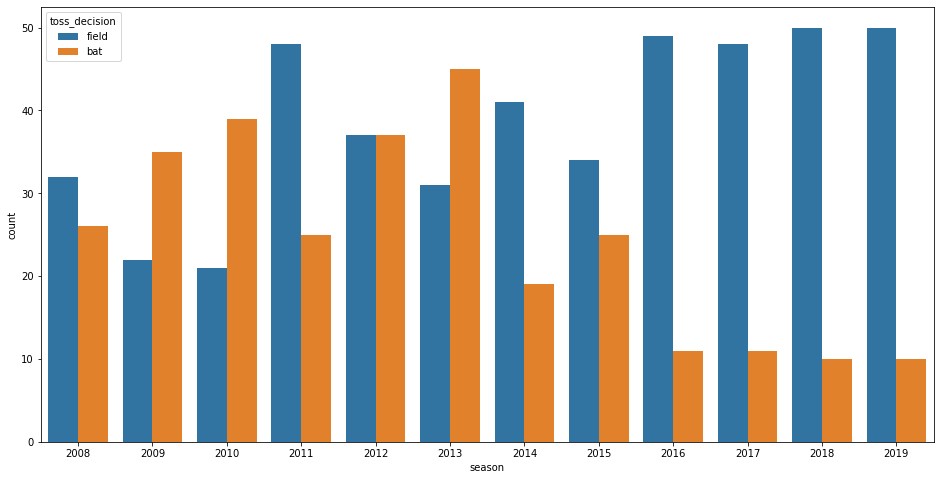

In [26]:
plt.figure(figsize= (16,8))
sns.countplot(x = 'season', hue = 'toss_decision', data = data)
plt.show()

#Number of times a team has won the match after winning the toss

In [27]:
np.sum(data['toss_winner']==data['winner'])

393

In [28]:
#Teams Elected to Bat First
bat_first=data[data['win_by_runs']!=0]
bat_first

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,11337,2019,Delhi,28/04/19,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,16,0,S Dhawan,Feroz Shah Kotla Ground,Bruce Oxenford,KN Ananthapadmanabhan
742,11338,2019,Kolkata,28/04/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Kolkata Knight Riders,34,0,AD Russell,Eden Gardens,Ian Gould,Nitin Menon
743,11339,2019,Hyderabad,29/04/19,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,45,0,DA Warner,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,O Nandan
745,11341,2019,Chennai,01/05/19,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,80,0,MS Dhoni,M. A. Chidambaram Stadium,Anil Dandekar,Nitin Menon


In [29]:
#Team that wins the most batting first
bat_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

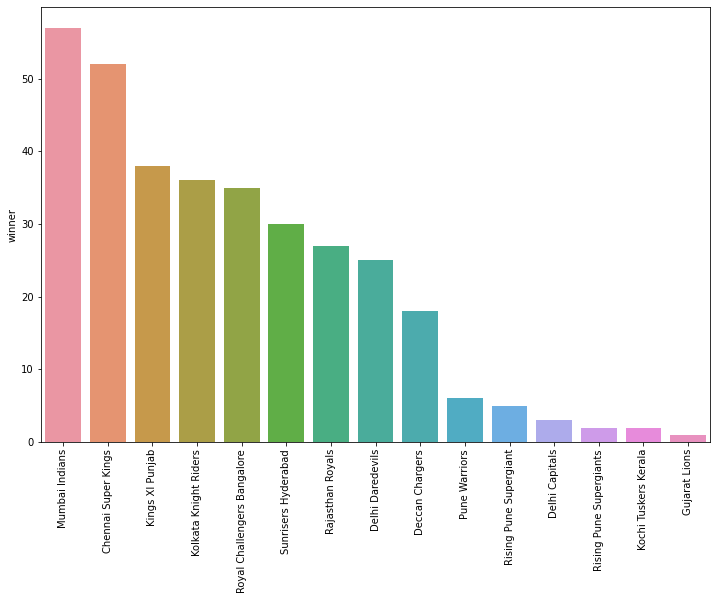

In [30]:
bf=bat_first['winner'].value_counts()
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(x=bf.index,y=bf,data=data)


In [31]:
bat_sec=data[data['win_by_wickets']!=0]
bat_sec

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,05/05/19,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [32]:
# Teams winning Batting Second
bat_sec['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Chennai Super Kings            48
Royal Challengers Bangalore    48
Rajasthan Royals               46
Delhi Daredevils               42
Kings XI Punjab                42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Delhi Capitals                  6
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

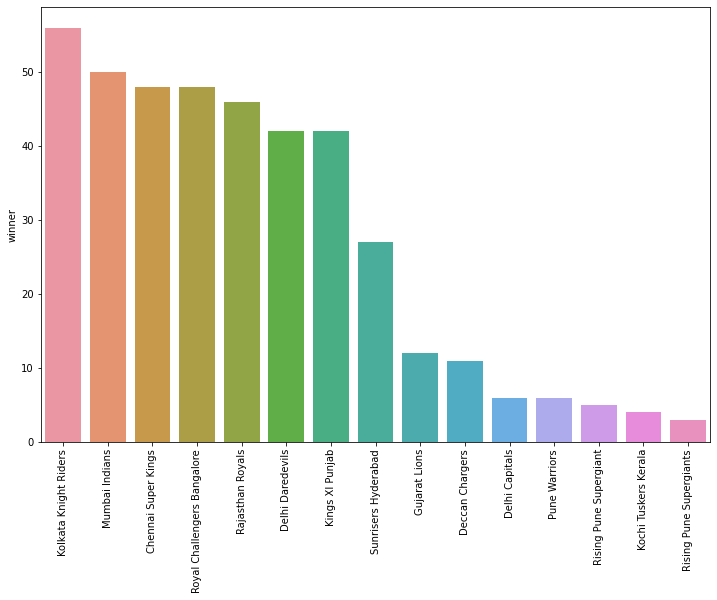

In [33]:
bs=bat_sec['winner'].value_counts()
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(x=bs.index,y=bs,data=data)

**MAN OF THE MATCH **

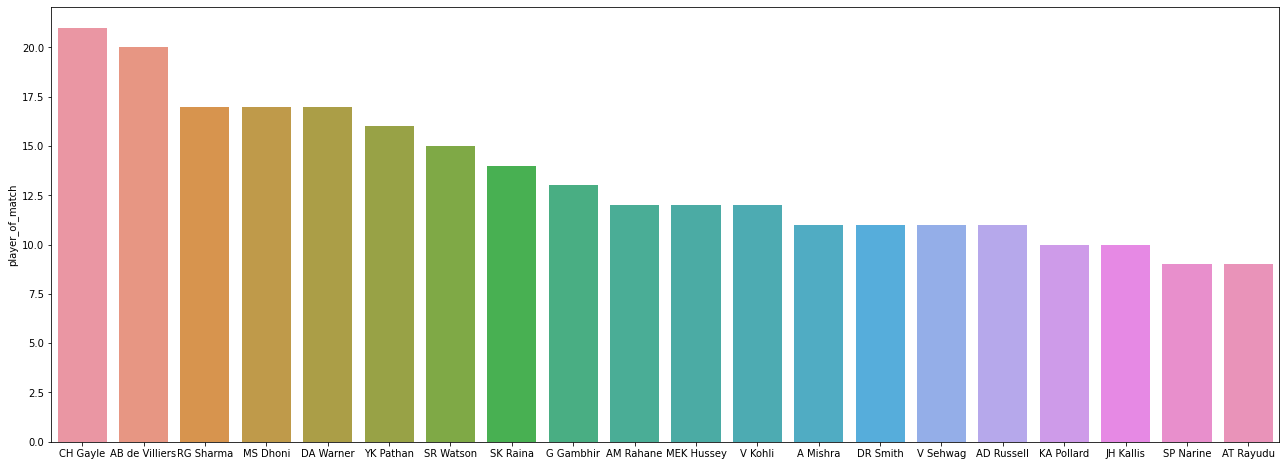

In [54]:

mom=data['player_of_match'].value_counts()[:20]
plt.figure(figsize=(22,8))
sns.barplot(data=data,y=mom,x=mom.index)

# Now we can import the second dataset named **DELIVERIES** 

In [41]:
deli = pd.read_csv("/content/deliveries.csv")

In [42]:
deli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [43]:
deli.shape

(72276, 21)

In [44]:
deli.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,72276.000000,72276.000000,72276.000000,72276.000000,72275.000000,72275.000000,72275.000000,72275.000000,72275.000000,72275.000000,72275.000000,72275.000000,72275.000000
mean,153.636297,1.479841,10.094748,3.623872,0.000457,0.039848,0.005617,0.023051,0.004981,0.000069,1.210930,0.073566,1.284497
std,87.990068,0.501394,5.665967,1.813627,0.021363,0.267799,0.120516,0.204739,0.078925,0.018598,1.590354,0.362626,1.579428
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,77.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,155.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,229.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,307.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,5.000000,7.000000


#Now its time to merge the dataset

In [46]:
merge = pd.merge(deli,data,left_on='match_id', right_on ='id')
merge.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


In [49]:
data.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [48]:
deli.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,72276.000000,72276.000000,72276.000000,72276.000000,72275.000000,72275.000000,72275.000000,72275.000000,72275.000000,72275.000000,72275.000000,72275.000000,72275.000000
mean,153.636297,1.479841,10.094748,3.623872,0.000457,0.039848,0.005617,0.023051,0.004981,0.000069,1.210930,0.073566,1.284497
std,87.990068,0.501394,5.665967,1.813627,0.021363,0.267799,0.120516,0.204739,0.078925,0.018598,1.590354,0.362626,1.579428
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,77.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,155.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,229.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,307.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,5.000000,7.000000


#Highest wicket takers 

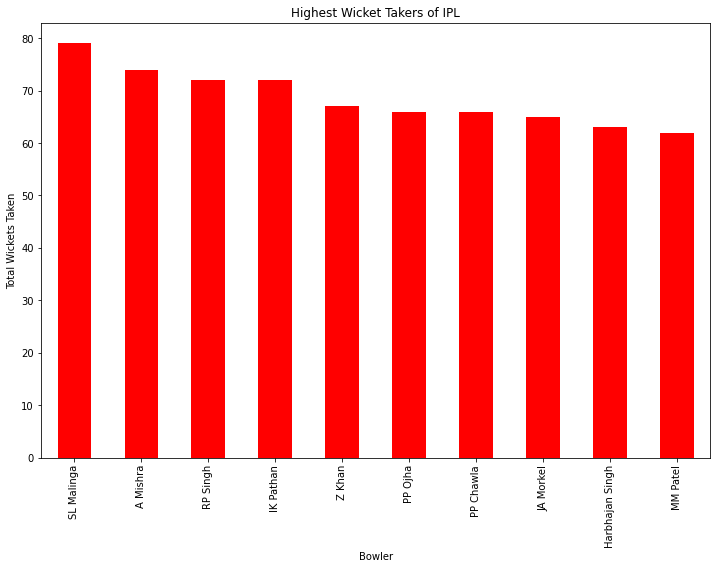

In [59]:
plt.figure(figsize=(12,8))
deli.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10).plot(kind='bar',color='red')
plt.title('Highest Wicket Takers of IPL')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets Taken')
plt.show()


#Batsman with higher number of sixes

In [63]:
six=merge[merge['batsman_runs']==6]
s=six.groupby('batsman').count()['batsman_runs'].sort_values(ascending=False).head(10)
s

batsman
SK Raina        91
CH Gayle        84
YK Pathan       82
AC Gilchrist    82
Yuvraj Singh    75
RG Sharma       73
RV Uthappa      70
MS Dhoni        69
BB McCullum     63
V Sehwag        60
Name: batsman_runs, dtype: int64

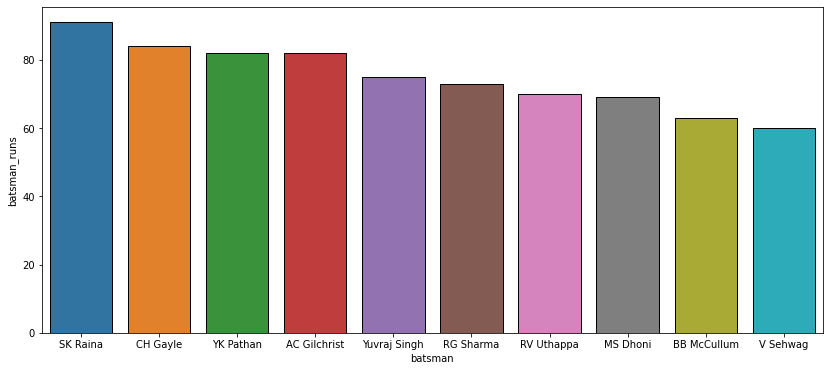

In [66]:
plt.figure(figsize=(14,6))
sns.barplot(data=merge,x=s.index,y=s,edgecolor = 'black')

#THANKYOU FOR THIS WONDEREFUL OPPURTUNITY THE SPARKS FOUNDATION.


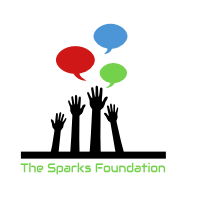